In [1]:
from keras.applications.vgg16 import VGG16

model = VGG16()

553467904/553467096 [==============================] - 221s 0us/step


In [2]:
# 入力層が 224 x 224, 出力層が 1,000 クラス分の確率
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
from keras.preprocessing.image import load_img

# VGG16 の入力サイズ 224 x 224 にリサイズして読み込み
img_dog = load_img("img/IMG_3557.jpg", target_size=(224, 224))

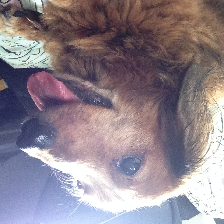

In [7]:
img_dog

In [8]:
from keras.preprocessing.image import img_to_array

# 数値データに変換
arr_dog = img_to_array(img_dog)

In [9]:
from keras.applications.vgg16 import preprocess_input

# 平均を 0 に加工 & RGB から BGR に変換
arr_dog = preprocess_input(arr_dog)

In [10]:
# VGG16 の入力サイズ 224 x 224 にリサイズして読み込み
img_dog_3551 = load_img("img/IMG_3551.jpg", target_size=(224, 224))
img_dog_3552 = load_img("img/IMG_3552.jpg", target_size=(224, 224))

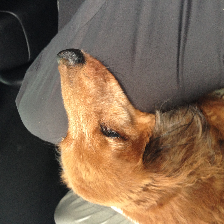

In [11]:
img_dog_3551

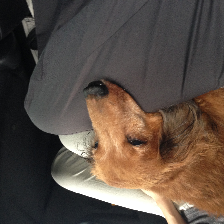

In [12]:
img_dog_3552

In [13]:
# 変換
arr_dog_3551 = preprocess_input(img_to_array(img_dog_3551))
arr_dog_3552 = preprocess_input(img_to_array(img_dog_3552))

In [14]:
import numpy as np

# 入力データ用に画像をまとめる
arr_input = np.stack([arr_dog, arr_dog_3551, arr_dog_3552])
arr_input.shape

(3, 224, 224, 3)

In [15]:
# 予測値を算出(1,000 クラス分の確率が出力)
probs = model.predict(arr_input)
probs.shape

(3, 1000)

In [16]:
probs

array([[1.0271746e-06, 7.6212746e-05, 1.8229099e-05, ..., 6.5370718e-06,
        3.7823245e-04, 3.9617126e-03],
       [6.1207766e-07, 1.0571876e-05, 2.5104529e-07, ..., 2.0009434e-06,
        2.2905778e-04, 4.8793782e-04],
       [1.7970543e-06, 6.1247533e-06, 9.3922728e-07, ..., 7.8852463e-06,
        3.7231803e-04, 1.1217071e-02]], dtype=float32)

In [17]:
from keras.applications.vgg16 import decode_predictions

# 予測値がそれぞれどのクラスに属しているかわかるようラベル付け
results = decode_predictions(probs)

# IMG_3557
results[0]

40960/35363 [==================================] - 0s 9us/step


[('n02112018', 'Pomeranian', 0.2671388),
 ('n02123394', 'Persian_cat', 0.10142018),
 ('n02085620', 'Chihuahua', 0.07231469),
 ('n02105855', 'Shetland_sheepdog', 0.06517001),
 ('n02113624', 'toy_poodle', 0.055029746)]

In [18]:
# IMG_3551
results[1]

[('n02094114', 'Norfolk_terrier', 0.17669798),
 ('n02094258', 'Norwich_terrier', 0.17563786),
 ('n02096051', 'Airedale', 0.1694653),
 ('n02096294', 'Australian_terrier', 0.117066),
 ('n02093991', 'Irish_terrier', 0.07966787)]

In [19]:
# IMG_3552
results[2]

[('n02094258', 'Norwich_terrier', 0.17920598),
 ('n02094114', 'Norfolk_terrier', 0.15781757),
 ('n02093991', 'Irish_terrier', 0.1266624),
 ('n02096294', 'Australian_terrier', 0.11584541),
 ('n02883205', 'bow_tie', 0.035702962)]